In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import math


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error

In [8]:
!gdown "1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4"


Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /Users/sachinbb/Linear_Regression/notebooks/Admission_Predict_Ver1.1.csv
100%|██████████████████████████████████████| 16.2k/16.2k [00:00<00:00, 21.6MB/s]


In [9]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [36]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
x= df.iloc[: , 1:-1]
y= df.iloc[:, -1]

In [12]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  train_size= 0.8, random_state= 42 )


standardization = StandardScaler()
x_train_scaled = standardization.fit_transform(x_train)
x_test_scaled = standardization.transform(x_test)


In [14]:
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet


list_of_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso": Lasso(0.2),
    "Elastic Net": ElasticNet(0.2)
}

r2_score for  model Linear Regression 0.82
mean squared error for model Linear Regression 0.0037


r2_score for  model Ridge Regression 0.82
mean squared error for model Ridge Regression 0.0037


r2_score for  model Lasso 0.81
mean squared error for model Lasso 0.0038


r2_score for  model Elastic Net 0.82
mean squared error for model Elastic Net 0.0037




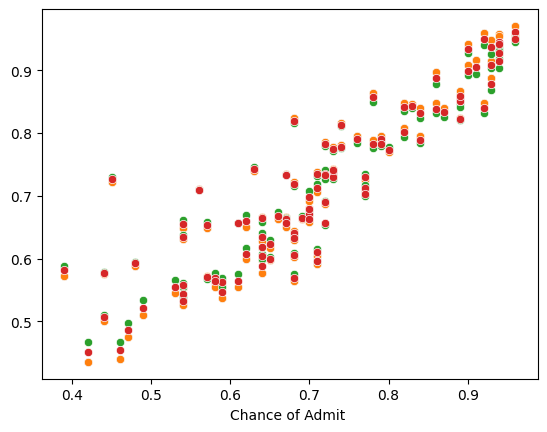

In [15]:
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet , ElasticNetCV

from sklearn.metrics import r2_score, mean_squared_error


list_of_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(0.1),
    "Lasso": Lasso(0.01),
    "Elastic Net": ElasticNet(0.01)

}


for name , model in list_of_models.items():
    data = model.fit(x_train_scaled, y_train)
    y_predicted = data.predict(x_test_scaled)
    sns.scatterplot(x= y_test, y=  y_predicted)

    print(f"r2_score for  model {name} {round(r2_score(y_test, y_predicted),2)}")
    print(f"mean squared error for model {name} {round(mean_squared_error(y_test, y_predicted),4)}")
    print("\n")
    

In [16]:
from  sklearn.model_selection import KFold, cross_val_score, cross_validate

list_of_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(0.1),
    "Lasso": Lasso(0.1),
    "Elastic Net CV": ElasticNet(0.1)

}


for name , model in list_of_models.items():

    cv = KFold(n_splits= 5, shuffle= True, random_state =22)
    data= cross_validate(model, x_train_scaled , y_train, scoring= ("r2", "neg_mean_squared_error"), cv= cv)
    r2_score = np.average(data["test_r2"])
    mean_squared_error = np.average(-data["test_neg_mean_squared_error"])

    print(f"r2_score for model {name} {r2_score}")
    print(f"mean squared error for model {name} {mean_squared_error}")
    print("\n")





r2_score for model Linear Regression 0.8023878862021835
mean squared error for model Linear Regression 0.003800015380442341


r2_score for model Ridge Regression 0.8024040082965099
mean squared error for model Ridge Regression 0.0037997362404370884


r2_score for model Lasso 0.2599118117851455
mean squared error for model Lasso 0.014674443624555594


r2_score for model Elastic Net CV 0.6486397436445539
mean squared error for model Elastic Net CV 0.006961931684348127




Manual Linear Regression Code

In [17]:
import numpy as np
from sklearn.model_selection import KFold

class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None


    def fit(self, x_train, y_train, iterations=1000):
        self.weights = np.zeros(x_train.shape[1])
        self.bias = 0
        mse_container = []

        for i in range(iterations):
            y_predicted = np.dot(x_train, self.weights) + self.bias

            mse = np.mean(np.square(y_train - y_predicted))
            mse_container.append(mse)

            dw = -2 / len(x_train) * np.dot(x_train.T, (y_train - y_predicted))
            db = -2 / len(x_train) * np.sum(y_train - y_predicted)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return mse_container

    def predict(self, x_test):
        return np.dot(x_test, self.weights) + self.bias

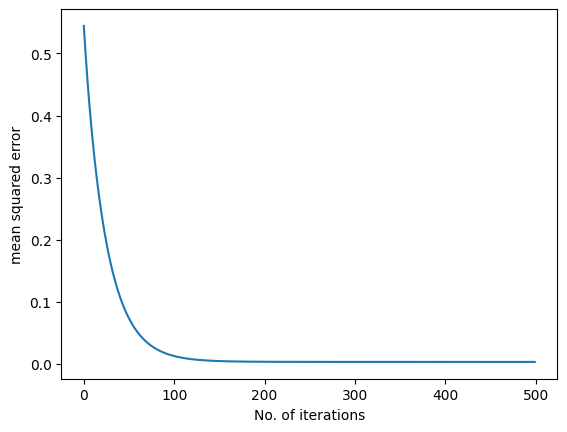

In [18]:
model = LinearRegression(0.01)
fit_value = model.fit(x_train_scaled, y_train , iterations= 500)

sns.lineplot(fit_value)
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")
plt.show()

<Axes: ylabel='Chance of Admit '>

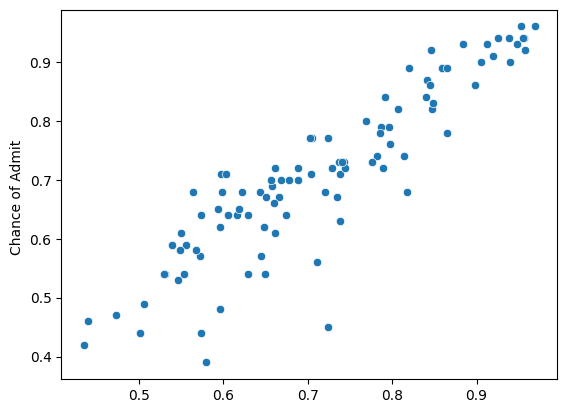

In [19]:
sns.scatterplot(x= model.predict(x_test_scaled), y= y_test)

In [20]:
x_train_scaled.shape

(400, 7)

Mean absolute error 0.04272290636388761
R2 Score 0.8188427127396902


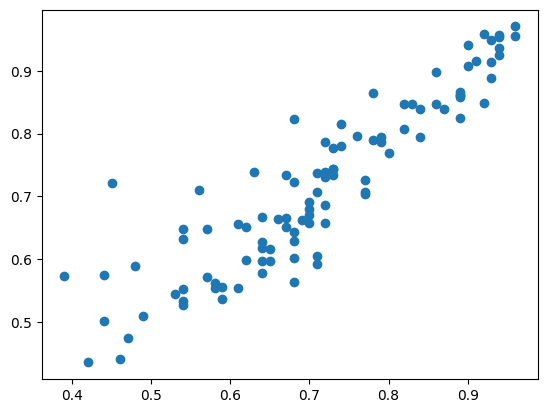

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge(0.01)
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)


print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Pickling the file

In [22]:
standardization

StandardScaler()

In [27]:
import pickle

pickle.dump(standardization, open("scaler.pkl", "wb"))
pickle.dump(ridge, open("ridge.pkl", "wb"))
